<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/MLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

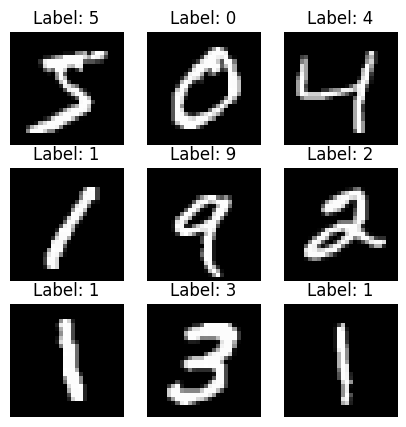

In [53]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from per_class_report import per_class_report
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# part 1
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = f.read()
        magic, num, rows, cols = np.frombuffer(data[:16], dtype='>u4')
        images = np.frombuffer(data[16:], dtype=np.uint8).reshape(num, rows * cols)
    return images

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = f.read()
        magic, num = np.frombuffer(data[:8], dtype='>u4')
        labels = np.frombuffer(data[8:], dtype=np.uint8)
    return labels

# load MNIST data
X_train = load_images("train-images-idx3-ubyte.gz")
y_train = load_labels("train-labels-idx1-ubyte.gz")
X_test = load_images("t10k-images-idx3-ubyte.gz")
y_test = load_labels("t10k-labels-idx1-ubyte.gz")

# normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# charts
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("")
plt.show()

In [54]:
# part 2
from sklearn.utils import shuffle
np.random.seed(42)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(4,),
                    activation='relu',
                    solver='adam',
                    batch_size=10000,
                    learning_rate_init=0.01,
                    max_iter=20,
                    random_state=42,
                    verbose=True)

mlp.fit(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train, random_state=42)
y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")
from sklearn.metrics import accuracy_score

# target_accuracy = 0.80
# best_neurons = None
# best_acc = 0

# for neurons in range(2, 65):
#     mlp = MLPClassifier(hidden_layer_sizes=(neurons,),
#                         activation='relu',
#                         solver='adam',
#                         batch_size=10000,
#                         learning_rate_init=0.01,
#                         max_iter=20,
#                         random_state=42,
#                         verbose=False)
#     mlp.fit(X_train, y_train)
#     y_pred = mlp.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"Neurons: {neurons:2d} | Test Accuracy: {acc*100:.2f}%")

#     if acc >= target_accuracy:
#         best_neurons = neurons
#         best_acc = acc
#         print(f"\nFound minimal architecture achieving >=80% accuracy: {neurons} neurons ({acc*100:.2f}%)\n")
#         break

Iteration 1, loss = 2.26634290
Iteration 2, loss = 2.04608239
Iteration 3, loss = 1.82628985
Iteration 4, loss = 1.60719341
Iteration 5, loss = 1.42667017
Iteration 6, loss = 1.30092528
Iteration 7, loss = 1.20049444
Iteration 8, loss = 1.09826999
Iteration 9, loss = 1.02458314
Iteration 10, loss = 0.96248438
Iteration 11, loss = 0.91340660
Iteration 12, loss = 0.87135810
Iteration 13, loss = 0.82207750
Iteration 14, loss = 0.76095574
Iteration 15, loss = 0.68752701
Iteration 16, loss = 0.62883183
Iteration 17, loss = 0.59342099
Iteration 18, loss = 0.57338830
Iteration 19, loss = 0.55973884
Iteration 20, loss = 0.54930237


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 84.31%


classification report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       980
           1       0.92      0.96      0.94      1135
           2       0.83      0.77      0.80      1032
           3       0.82      0.83      0.82      1010
           4       0.87      0.89      0.88       982
           5       0.80      0.67      0.73       892
           6       0.87      0.91      0.89       958
           7       0.86      0.87      0.87      1028
           8       0.76      0.77      0.77       974
           9       0.83      0.80      0.81      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

classification for each digits:

====== PER CLASS REPORT ======

Class 0:
  Total samples: 980
  Correctly classified: 909
  Accuracy: 92.76%
  Misclassified: 71
  Misclassified into:
     Class 5: 31 times (3.16%)
   

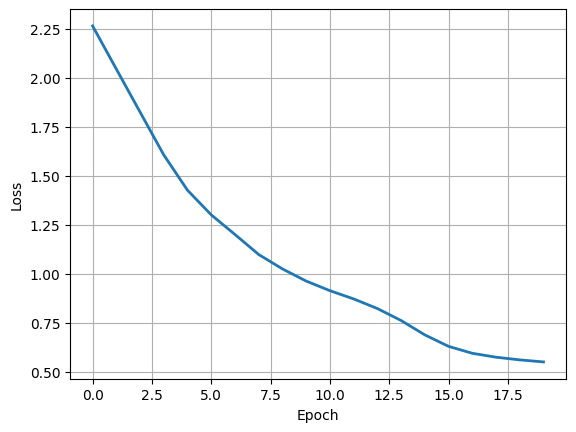

In [55]:
# part 3
print("classification report:")
print(classification_report(y_test, y_pred))

print("classification for each digits:")
per_class_report(y_test, y_pred)

plt.figure()
plt.plot(mlp.loss_curve_, linewidth=2)
plt.title("")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

X_train_ar shape: (60000, 784)
y_train_ar shape: (60000,)
X_test_ar shape: (10000, 784)
y_test_ar shape: (10000,)


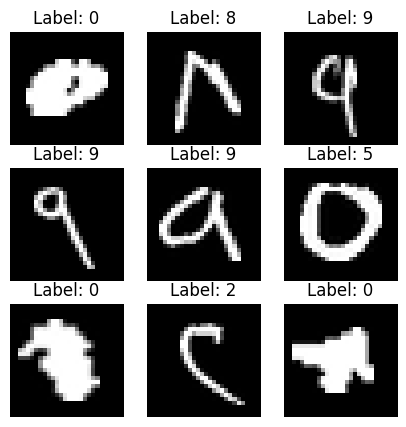

In [56]:
# part 4
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = f.read()
        _, num, rows, cols = np.frombuffer(data[:16], dtype='>u4')
        images = np.frombuffer(data[16:], dtype=np.uint8).reshape(num, rows * cols)
    return images

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = f.read()
        _, num = np.frombuffer(data[:8], dtype='>u4')
        labels = np.frombuffer(data[8:], dtype=np.uint8)
    return labels

# load Arabic dataset
X_train_ar = load_images("ARABIC_train-images-idx3-ubyte.gz") / 255.0
y_train_ar = load_labels("ARABIC_train-labels-idx1-ubyte.gz")
X_test_ar = load_images("ARABIC_t10k-images-idx3-ubyte.gz") / 255.0
y_test_ar = load_labels("ARABIC_t10k-labels-idx1-ubyte.gz")

print(f"X_train_ar shape: {X_train_ar.shape}")
print(f"y_train_ar shape: {y_train_ar.shape}")
print(f"X_test_ar shape: {X_test_ar.shape}")
print(f"y_test_ar shape: {y_test_ar.shape}")

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train_ar[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train_ar[i]}")
    plt.axis('off')
plt.suptitle("")
plt.show()


In [57]:
# part 5
np.random.seed(42)
X_train_ar, y_train_ar = shuffle(X_train_ar, y_train_ar, random_state=42)

mlp_arabic = MLPClassifier(hidden_layer_sizes=(4,),
                           activation='relu',
                           solver='adam',
                           batch_size=10000,
                           learning_rate_init=0.01,
                           max_iter=20,
                           random_state=None,
                           verbose=True)


Iteration 1, loss = 2.15231114
Iteration 2, loss = 1.85422360
Iteration 3, loss = 1.64698466
Iteration 4, loss = 1.46441283
Iteration 5, loss = 1.31216236
Iteration 6, loss = 1.18290762
Iteration 7, loss = 1.08283086
Iteration 8, loss = 0.99866139
Iteration 9, loss = 0.92551353
Iteration 10, loss = 0.85826985
Iteration 11, loss = 0.79886095
Iteration 12, loss = 0.74299810
Iteration 13, loss = 0.68502668
Iteration 14, loss = 0.62140888
Iteration 15, loss = 0.54311674
Iteration 16, loss = 0.46450544
Iteration 17, loss = 0.40363450
Iteration 18, loss = 0.36200072
Iteration 19, loss = 0.33430905
Iteration 20, loss = 0.31502253
              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1000
           1       0.92      0.95      0.93      1000
           2       0.92      0.90      0.91      1000
           3       0.95      0.88      0.91      1000
           4       0.91      0.84      0.87      1000
           5       0.94      0.91      0.92 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


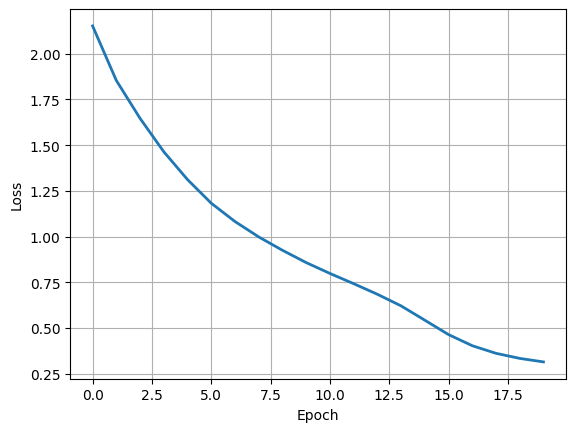

In [58]:
# part 6
mlp_arabic.fit(X_train_ar, y_train_ar)

y_pred_ar = mlp_arabic.predict(X_test_ar)

print(classification_report(y_test_ar, y_pred_ar))

per_class_report(y_test_ar, y_pred_ar)

plt.figure()
plt.plot(mlp_arabic.loss_curve_, linewidth=2)
plt.title("")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [59]:
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = f.read()
        _, num, rows, cols = np.frombuffer(data[:16], dtype='>u4')
        images = np.frombuffer(data[16:], dtype=np.uint8).reshape(num, rows * cols)
    return images

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = f.read()
        _, num = np.frombuffer(data[:8], dtype='>u4')
        labels = np.frombuffer(data[8:], dtype=np.uint8)
    return labels

# Load MNIST
X_train_mnist = load_images("train-images-idx3-ubyte.gz") / 255.0
y_train_mnist = load_labels("train-labels-idx1-ubyte.gz")
X_test_mnist = load_images("t10k-images-idx3-ubyte.gz") / 255.0
y_test_mnist = load_labels("t10k-labels-idx1-ubyte.gz")

# Load Arabic
X_train_ar = load_images("ARABIC_train-images-idx3-ubyte.gz") / 255.0
y_train_ar = load_labels("ARABIC_train-labels-idx1-ubyte.gz")
X_test_ar = load_images("ARABIC_t10k-images-idx3-ubyte.gz") / 255.0
y_test_ar = load_labels("ARABIC_t10k-labels-idx1-ubyte.gz")

Iteration 1, loss = 2.15287546
Iteration 2, loss = 1.84901665
Arabic-only 2 Epoch Accuracy: 0.3494


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


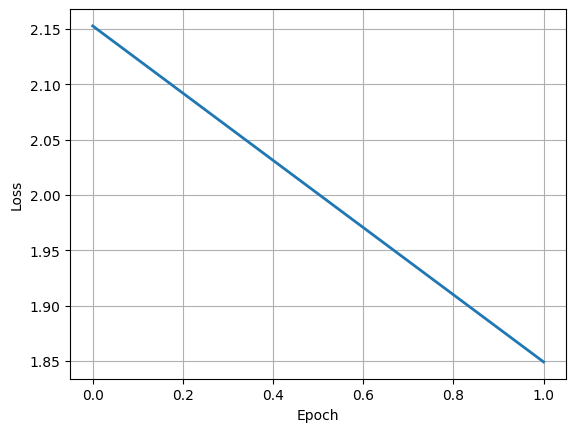

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.87      0.93      0.89      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.76      0.90      0.82      1000
           7       0.68      0.74      0.71      1000
           8       0.14      0.93      0.24      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.35     10000
   macro avg       0.24      0.35      0.27     10000
weighted avg       0.24      0.35      0.27     10000


====== PER CLASS REPORT ======

Class 0:
  Total samples: 1000
  Correctly classified: 0
  Accuracy: 0.00%
  Misclassified: 1000
  Misclassified into:
     Class 8: 710 times (71.00%)
     Class 7: 224 times (22.40%)
     Class 1: 36 times 

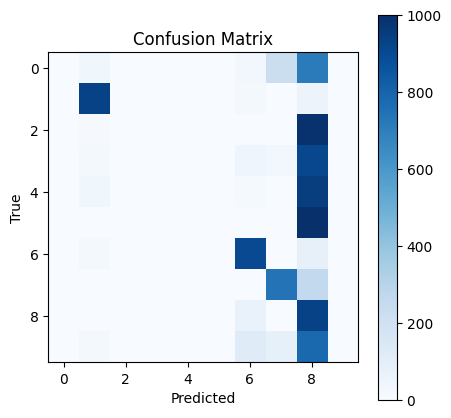

In [60]:
# part 7
model_ar_2epochs = MLPClassifier(hidden_layer_sizes=(4,),
                                 activation='relu', solver='adam',
                                 learning_rate_init=0.01,
                                 batch_size=10000,
                                 max_iter=2, random_state=42, verbose=True)
model_ar_2epochs.fit(X_train_ar, y_train_ar)
y_pred_ar = model_ar_2epochs.predict(X_test_ar)
accuracy_ar_2epochs = accuracy_score(y_test_ar, y_pred_ar)
print("Arabic-only 2 Epoch Accuracy:", accuracy_ar_2epochs)

plt.figure()
plt.plot(model_ar_2epochs.loss_curve_, linewidth=2)
plt.title("")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

print(classification_report(y_test_ar, y_pred_ar))

per_class_report(y_test_ar, y_pred_ar)

cm_tl = confusion_matrix(y_test_ar, y_pred_ar)
plt.figure(figsize=(5,5))
plt.imshow(cm_tl, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


Iteration 1, loss = 2.26668721
Iteration 2, loss = 2.05573496
Iteration 3, loss = 1.87188205
Iteration 4, loss = 1.68934608
Iteration 5, loss = 1.51216353
Iteration 6, loss = 1.35943757
Iteration 7, loss = 1.23337264
Iteration 8, loss = 1.11919421
Iteration 9, loss = 1.03737547
Iteration 10, loss = 0.96998864
Iteration 11, loss = 0.91989376
Iteration 12, loss = 0.87642130
Iteration 13, loss = 0.82869772
Iteration 14, loss = 0.76877561
Iteration 15, loss = 0.69782581
Iteration 16, loss = 0.63549719
Iteration 17, loss = 0.59630638
Iteration 18, loss = 0.57420344
Iteration 19, loss = 0.56077141
Iteration 20, loss = 0.54941319


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MNIST Test Accuracy: 84.44%
Iteration 1, loss = 4.32797555
Iteration 2, loss = 2.69720042
MNIST→Arabic (Full MNIST + 2 Arabic Epochs) Accuracy: 0.3042
              precision    recall  f1-score   support

           0       0.32      0.16      0.21      1000
           1       0.50      0.69      0.58      1000
           2       0.49      0.10      0.16      1000
           3       0.16      0.12      0.14      1000
           4       0.17      0.35      0.23      1000
           5       0.33      0.76      0.46      1000
           6       0.00      0.00      0.00      1000
           7       0.48      0.48      0.48      1000
           8       0.03      0.01      0.01      1000
           9       0.32      0.36      0.34      1000

    accuracy                           0.30     10000
   macro avg       0.28      0.30      0.26     10000
weighted avg       0.28      0.30      0.26     10000


====== PER CLASS REPORT ======

Class 0:
  Total samples: 1000
  Correctly classified: 16

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


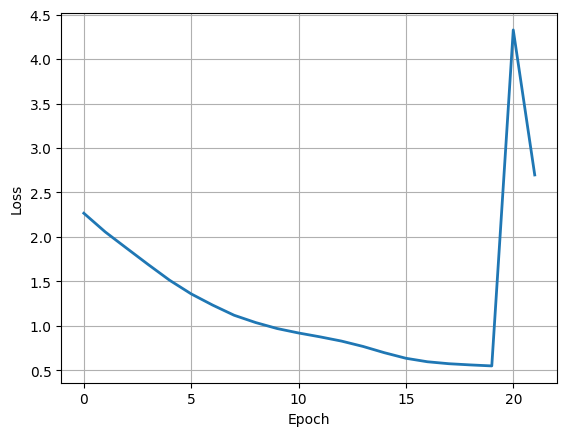

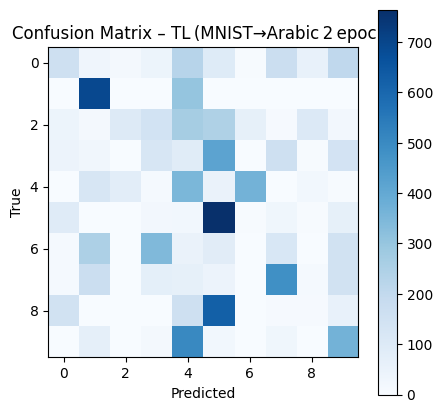

In [61]:
# part 8
mnist_to_ar_model = MLPClassifier(hidden_layer_sizes=(4,),
                    activation='relu',
                    solver='adam',
                    batch_size=10000,
                    learning_rate_init=0.01,
                    max_iter=20,
                    random_state=42,
                    verbose=True)
mnist_to_ar_model.fit(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train, random_state=42)
y_pred = mnist_to_ar_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"MNIST Test Accuracy: {acc*100:.2f}%")


mnist_to_ar_model.max_iter = 2
mnist_to_ar_model.warm_start = True
mnist_to_ar_model.fit(X_train_ar, y_train_ar)

y_pred_tl_ar = mnist_to_ar_model.predict(X_test_ar)
accuracy_tl_ar = accuracy_score(y_test_ar, y_pred_tl_ar)
print("MNIST→Arabic (Full MNIST + 2 Arabic Epochs) Accuracy:", accuracy_tl_ar)

print(classification_report(y_test_ar, y_pred_tl_ar))

per_class_report(y_test_ar, y_pred_tl_ar)

plt.figure()
plt.plot(mnist_to_ar_model.loss_curve_, linewidth=2)
plt.title("")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

cm_tl = confusion_matrix(y_test_ar, y_pred_tl_ar)
plt.figure(figsize=(5,5))
plt.imshow(cm_tl, cmap='Blues')
plt.title("Confusion Matrix – TL (MNIST→Arabic 2 epoch)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()
